<img src="./images/DLI_Header.png" style="width: 400px;">

# MNIST 데이터세트로 이미지 분류

이 섹션에서는 딥러닝의 "Hello World"를 수행하여 수기 문자를 올바르게 분류하도록 딥러닝 모델을 트레이닝해보겠습니다.

## 목표

* 딥러닝이 기존의 프로그래밍 메서드로는 불가능했던 문제를 어떻게 해결할 수 있는지 이해
* [MNSIT 수기 문자 데이터세트](http://yann.lecun.com/exdb/mnist/)에 대해 알아보기
* [Keras API](https://keras.io/)를 사용하여 MNIST 데이터세트를 로드하고 트레이닝을 위해 준비
* 단순한 뉴럴 네트워크를 구축하여 이미지 분류 수행
* 준비된 MNIST 데이터세트를 사용하여 뉴럴 네트워크 트레이닝
* 트레이닝된 뉴럴 네트워크의 성능 관찰

## 문제: 이미지 분류

기존 프로그래밍에서는 프로그래머가 코드에 규칙과 조건을 설명할 수 있으며, 프로그램은 이를 사용하여 올바른 방식으로 동작할 수 있습니다. 이 접근 방식은 매우 다양한 문제에 대해 계속해서 뛰어난 효과를 보여줍니다.

처음 접한 이미지를 정확한 클래스로 올바르게 분류하도록 프로그램에 요청하는 이미지 분류는 기존 프로그래밍 기술로는 해결하기가 거의 불가능합니다. 특히 처음 접하는 이미지를 고려할 때 어떻게 해서 프로그래머가 매우 다양한 이미지를 올바르게 분류하기 위한 규칙과 조건을 정의할 수 있을까요?

## 솔루션: 딥러닝

딥러닝은 시행착오를 통한 패턴 인식에 뛰어난 면모를 보입니다. 충분한 데이터로 딥 뉴럴 네트워크를 트레이닝하고 트레이닝을 통해 성능에 대한 피드백을 네트워크에 제공함으로써 네트워크는 엄청난 수의 반복이 요구되기는 하지만 그래도 올바른 방식으로 작동할 수 있는 기준이 되는 나름의 조건을 식별할 수 있습니다.

## MNIST 데이터세트

딥러닝의 역사에서, 0~9의 수기 문자로 구성된 70,000개의 회색조 이미지가 모여 있는 [MNSIT 데이터세트](http://yann.lecun.com/exdb/mnist/)의 정확한 이미지 분류는 엄청난 발전이었습니다. 오늘날에는 문제가 사소하게 여겨지고 있지만 MNIST를 사용한 이미지 분류 수행은 딥러닝의 "Hello World"와 같은 것이 되었습니다.

다음은 MNIST 데이터세트에 포함된 이미지 중 40개입니다.

<img src="./images/mnist1.png" style="width: 600px;">

## 트레이닝 및 검증 데이터 및 레이블

딥러닝을 위해 이미지로 작업할 때에는 이미지 자체(대개 `X`로 표시됨)뿐 아니라 이러한 이미지의 올바른 [레이블](https://developers.google.com/machine-learning/glossary#label)(대개 `Y`로 표시됨)가 모두 필요합니다. 아울러, 모델 *트레이닝*을 위한 `X` 및 `Y` 값이 둘 다 필요하며, 트레이닝된 이후의 모델 성능 *검증*을 위한 별도의 `X` 및 `Y` 값이 필요합니다. 따라서 MNIST 데이터세트에는 다음 4개의 데이터 세그먼트가 필요합니다.

1. `x_train`: 뉴럴 네트워크를 트레이닝하는 데 사용되는 이미지
2. `y_train`: `x_train` 트레이닝 중 모델의 예측을 평가하는 데 사용되는 올바른 이미지 레이블
3. `x_valid`: 트레이닝된 모델의 성능 검증을 위해 따로 확보해 놓는 이미지
4. `y_valid`: `x_valid` 트레이닝 후 모델의 예측을 평가하는 데 사용되는 올바른 이미지 레이블

분석을 위한 데이터 준비 과정을 [데이터 엔지니어링](https://medium.com/@rchang/a-beginners-guide-to-data-engineering-part-i-4227c5c457d7)이라고 부릅니다. 트레이닝 데이터와 검증 데이터(및 테스트 데이터) 간의 차이점에 대해 자세히 알아보려면 Jason Browlee가 작성한 [이 문서](https://machinelearningmastery.com/difference-test-validation-datasets/)를 참조하십시오.

## 데이터를 메모리에 로드(Keras 사용)

다수의 [딥러닝 프레임워크](https://developer.nvidia.com/deep-learning-frameworks)가 존재하며, 각자 나름의 장점을 지니고 있습니다. 이 워크숍에서는 [Tensorflow 2](https://www.tensorflow.org/tutorials/quickstart/beginner), 구체적으로는 [Keras API](https://keras.io/)를 사용할 것입니다. Keras에는 컴퓨터 비전 작업을 위해 고안된 다수의 유용한 기능이 내장되어 있습니다. [가독성](https://blog.pragmaticengineer.com/readable-code/) 및 효율성 덕분에 전문가적 환경에서 딥러닝을 위한 타당한 선택이기도 합니다. 하지만 Keras만 그런 것이 아니므로 딥러닝 프로젝트를 시작할 때는 다양한 프레임워크를 살펴볼 가치가 있습니다.

Keras가 제공하는 여러 유용한 기능 중 하나는 MNIST를 비롯한 [여러 공통 데이터 세트](https://www.tensorflow.org/api_docs/python/tf/keras/datasets)를 위한 다수의 헬퍼 메서드를 포함하는 모듈입니다.

먼저 MNIST를 위한 Keras 데이터세트를 로드해 보겠습니다.

In [1]:
from tensorflow.keras.datasets import mnist

`mnist` 모듈의 경우 트레이닝 및 검증을 위해 이미지와 레이블로 미리 분할되어 있는 MNIST 데이터를 쉽게 로드할 수 있습니다.

In [2]:
# the data, split between train and validation sets
(x_train, y_train), (x_valid, y_valid) = mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


## MNIST 데이터 살펴보기

앞서 언급했던 것처럼 MNIST 데이터세트에는 수기 문자로 이루어진 70,000개의 회색조 이미지가 포함되어 있습니다. 다음 셀을 실행하면 Keras가 트레이닝을 위해 60,000개의 이미지, 검증(트레이닝 후)을 위해 10,000개의 이미지를 분할했으며 각 이미지 자체가 28x28 차원의 2D 어레이임을 확인할 수 있습니다.

In [3]:
x_train.shape

(60000, 28, 28)

In [4]:
x_valid.shape

(10000, 28, 28)

뿐만 아니라, 이러한 28x28 이미지가 0~255의 서명되지 않은 8비트 정수 값 모음으로 표현되는 것을 확인할 수 있습니다. 이는 픽셀의 회색조 값에 해당하는 값들로, `0`은 검은색, `255`는 흰색, 그리고 나머지 모든 값은 둘 사이의 값에 해당합니다.

In [5]:
x_train.dtype

dtype('uint8')

In [6]:
x_train.min()

0

In [7]:
x_train.max()

255

In [8]:
x_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

[Matplotlib](https://matplotlib.org/)를 사용하면 데이터세트에서 이러한 회색조 이미지 중 하나를 렌더링할 수 있습니다.

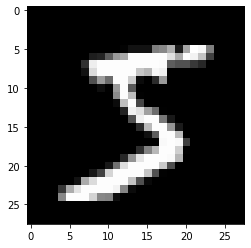

In [9]:
import matplotlib.pyplot as plt

image = x_train[0]
plt.imshow(image, cmap='gray')

이렇게 하면 이것이 5의 28x28 픽셀 이미지임을 알 수 있습니다. 아니면 3일까요? 답은 데이터의 올바른 레이블을 포함하는 `y_train` 데이터에 있습니다. 한번 살펴보겠습니다.

In [10]:
y_train[0]

5

## 트레이닝을 위한 데이터 준비

딥러닝에서는 대부분의 경우 트레이닝을 위한 적합한 상태로 데이터를 변환해야 합니다. 이러한 특정 이미지 분류 문제의 경우, 트레이닝을 준비하는 과정에서 데이터에 3가지 작업을 수행해야 합니다.
1. 이미지 데이터를 평탄화하여 모델에 입력되는 이미지를 간소화해야 합니다.
2. 이미지 데이터를 정규화하여 이미지 입력 값이 모델에서 더 쉽게 작동되도록 해야 합니다.
3. 레이블을 분류하여 레이블 값이 모델에서 더 쉽게 작동되도록 해야 합니다.

### 이미지 데이터 평탄화

딥러닝 모델에서 2차원 이미지(우리 경우에는 28x28픽셀)를 사용할 수도 있긴 하지만 여기서는 간단하게 각 이미지를 784개의 연속 픽셀(참고: 28x28 = 784)로 이루어진 단일 어레이로 [재구성(reshape)](https://www.tensorflow.org/api_docs/python/tf/reshape)하겠습니다. 이는 이미지 평탄화라고도 불립니다.

여기서는 헬퍼 메서드 `reshape`를 사용하여 이를 수행합니다.

In [11]:
x_train = x_train.reshape(60000, 784)
x_valid = x_valid.reshape(10000, 784)

이미지가 재구성되어 각 784개의 픽셀 값을 포함하는 1D 어레이의 모음이 되었음을 확인할 수 있습니다.

In [12]:
x_train.shape

(60000, 784)

In [13]:
x_train[0]

array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   3,  18,  18,  18,
       126, 136, 175,  26, 166, 255, 247, 127,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,  30,  36,  94, 154, 17

### 이미지 데이터 정규화

딥러닝 모델은 0에서 1 사이의 부동 소수점 수를 처리하는 데 더 뛰어납니다(이 주제에 대해서는 나중에 자세히 다루겠습니다). 정수 값을 0에서 1 사이의 부동 소수점 값으로 변환하는 것을 [정규화](https://developers.google.com/machine-learning/glossary#normalization)라고 하며, 여기서는 데이터를 정규화하기 위해 모든 픽셀 값(앞에서 언급했던 것처럼 0~255)을 255로 나누는 단순한 접근 방법을 사용하겠습니다.

In [14]:
x_train = x_train / 255
x_valid = x_valid / 255 

이제 값이 모두 `0.0`~`1.0`의 부동 소수점 값으로 변환되었음을 확인할 수 있습니다.

In [15]:
x_train.dtype

dtype('float64')

In [16]:
x_train.min()

0.0

In [17]:
x_train.max()

1.0

### 범주 인코딩

7 - 2의 답이 뭐냐고 묻는 질문을 받는다고 가정해 보겠습니다. 4라고 답하는 것은 9라고 답하는 것보다 훨씬 정답에 근접합니다. 하지만 이러한 이미지 분류 문제의 경우 뉴럴 네트워크가 이런 종류의 추론을 배우지 않도록 하는 것이 좋습니다. 그냥 올바른 범주를 선택하고 숫자 5의 이미지가 있는 경우 4를 추측하는 것이 9를 추측하는 것 만큼이나 나쁘다는 점을 이해하도록 해야 합니다.

이미지의 레이블은 현재 상태 그대로 0~9의 정수입니다. 이러한 값이 숫자 범위를 나타내므로, 모델은 올바른 숫자 범주에 얼마나 근접하게 추측하는지에 따라 성능에 대한 어떤 결론을 내리려 할 수도 있습니다.

따라서 여기서는 데이터에 범주 인코딩이라는 작업을 수행하겠습니다. 이러한 변환은 이 특정 값이 true로 설정된 실제 범주를 포함해 각 값이 가능한 모든 범주의 모음이 되도록 데이터를 수정합니다.

간단히 예를 들면, 빨간색, 파란색, 초록색, 이렇게 3개의 범주가 있다고 가정해 보겠습니다. 주어진 색상에 대해 이러한 범주 중 둘은 false, 나머지 하나는 true가 될 것입니다.

|Actual Color| Is Red? | Is Blue? | Is Green?|
|------------|---------|----------|----------|
|Red|True|False|False|
|Green|False|False|True|
|Blue|False|True|False|
|Green|False|False|True|

"True" 또는 "False"를 사용하는 대신 0 또는 1의 바이너리를 사용하여 같은 내용을 표현할 수 있습니다.

|Actual Color| Is Red? | Is Blue? | Is Green?|
|------------|---------|----------|----------|
|Red|1|0|0|
|Green|0|0|1|
|Blue|0|1|0|
|Green|0|0|1|

이것이 범주 인코딩 즉, 범주 레이블로 이해되어야 하는 값을 모델이 범주 특성을 알 수 있는 표현으로 변환하는 것입니다. 따라서 다음의 값을 트레이닝에 사용할 경우

```python
values = ['red, green, blue, green']
```

... 뉴럴 네트워크가 이를 이해하기는 매우 어렵기에 다음과 같이 변환합니다.

```python
values = [
    [1, 0, 0],
    [0, 0, 1],
    [0, 1, 0],
    [0, 0, 1]
]
```

### 레이블 범주 인코딩

Keras는 [값을 범주 인코딩](https://www.tensorflow.org/api_docs/python/tf/keras/utils/to_categorical)하는 유틸리티를 제공하며, 여기서는 이를 사용하여 트레이닝 및 검증 레이블 모두에 대한 범주 인코딩을 수행합니다.

In [18]:
import tensorflow.keras as keras
num_categories = 10

y_train = keras.utils.to_categorical(y_train, num_categories)
y_valid = keras.utils.to_categorical(y_valid, num_categories)

다음은 트레이닝 레이블과 관련된 첫 번째 10개 값으로, 지금은 범주 인코딩이 되어 있는 것을 확인할 수 있습니다.

In [19]:
y_train[0:9]

array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

## 모델 생성

트레이닝을 위한 데이터가 준비되었으니 이제 데이터로 트레이닝할 모델을 생성해야 합니다. 이 첫 번째 기본 모델은 여러 개의 *레이어*로 이루어지며 3가지 주요 부분으로 구성됩니다.

1. 어느 정도 예상되는 형식으로 데이터를 수신하는 입력 레이어
2. 각각 다수의 *뉴런*으로 구성된 여러 개의 [숨겨진 레이어](https://developers.google.com/machine-learning/glossary#hidden-layer) 각 [뉴런](https://developers.google.com/machine-learning/glossary#neuron)은 *가중치*로 네트워크의 추측에 영향을 미칠 수 있으며, 가중치는 네트워크가 수많은 반복을 통해 성능에 대한 피드백을 수신하고 학습하면서 업데이트하게 되는 값입니다.
3. 주어진 이미지에 대한 네트워크의 추측을 보여주는 출력 레이어

### 모델 인스턴스화

우선 Keras의 [순차](https://www.tensorflow.org/api_docs/python/tf/keras/Sequential) 모델 클래스를 사용하여 데이터가 연속으로 통과할 일련의 레이어를 보유한 모델의 인스턴스를 인스턴스화하겠습니다.

In [20]:
from tensorflow.keras.models import Sequential

model = Sequential()

### 입력 레이어 생성

다음으로, 입력 레이어를 추가합니다. 이 레이어는 *밀집 연결*되어 있습니다. 따라서 포함된 각 뉴런과 가중치가 다음 레이어의 모든 뉴런에 영향을 줍니다. Keras로 이를 수행하려면 Keras의 [Dense](https://www.tensorflow.org/api_docs/python/tf/keras/layers/Dense) 레이어 클래스를 사용해야 합니다.

In [21]:
from tensorflow.keras.layers import Dense

`units` 인수는 레이어 내 뉴런 수를 지정합니다. 여기서는 실험에서 선택한 `512`를 사용하겠습니다. 올바른 뉴런 수를 선택하는 것은 데이터세트의 통계적 복잡성을 없애주는 일이므로, "데이터 사이언스" 작업의 핵심이라 할 수 있습니다. 나중에 이 값을 시험해보며 트레이닝에 어떤 영향을 미치는지 살펴보고 이 숫자의 의미에 대한 감을 키우시기 바랍니다.

활성화 함수에 대해서는 나중에 자세히 알아보겠지만 일단은 `relu` 활성화 함수를 사용하겠습니다. 간략하게 설명하자면, 이 함수는 네트워크가 일부 엄격한 선형 함수를 토대로 추측해야 하는 경우에 비해 데이터에 대한 좀 더 정교한 추측을 하는 방법을 배울 수 있게 도와줍니다.

`input_shape` 값은 수신되는 데이터의 모양을 지정하며, 여기서는 784개 값으로 이루어진 1D 어레이입니다.

In [22]:
model.add(Dense(units=512, activation='relu', input_shape=(784,)))

### 숨겨진 레이어 생성

이제 밀집 연결된 추가 레이어를 더해 보겠습니다. 마찬가지로, 이와 관련된 내용도 나중에 자세히 알아보겠지만, 지금은 이러한 레이어가 추측에 기여하는 더 많은 매개변수 즉, 정확한 학습을 위한 좀 더 예리한 기회를 네트워크에 제공한다는 사실을 알면 됩니다.

In [23]:
model.add(Dense(units = 512, activation='relu'))

### 출력 레이어 생성

마지막으로, 출력 레이어를 추가하겠습니다. 이 레이어는 각 레이어의 값이 0에서 1사이의 확률이 되도록 하고 레이어의 모든 출력이 1에 추가되도록 하는 활성 함수인 `softmax`를 사용합니다. 이 경우에는 네트워크가 1에서 10까지의 가능한 범주에 속하는 단일 이미지에 대해 추측을 수행하므로 출력은 10개가 됩니다. 각 출력은 이미지가 해당 특정 클래스에 속한다는 모델의 추측(확률)을 제공합니다.

In [24]:
model.add(Dense(units = 10, activation='softmax'))

### 모델 요약

Keras는 모델에 대한 읽을 수 있는 요약을 출력하는 모델 인스턴스 메서드 [요약](https://www.tensorflow.org/api_docs/python/tf/summary)을 제공합니다.

In [25]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 512)               401920    
_________________________________________________________________
dense_1 (Dense)              (None, 512)               262656    
_________________________________________________________________
dense_2 (Dense)              (None, 10)                5130      
Total params: 669,706
Trainable params: 669,706
Non-trainable params: 0
_________________________________________________________________


트레이닝 가능한 매개변수의 수를 확인하십시오. 이러한 각 매개변수는 트레이닝 도중에 조정 가능하며 트레이닝된 모델의 추측에 기여합니다.

### 모델 컴파일

마찬가지로 좀 더 상세한 내용이 따르겠지만 실제로 데이터를 사용하여 모델을 트레이닝하기 전에 수행해야 할 마지막 단계는 모델을 [컴파일](https://www.tensorflow.org/api_docs/python/tf/keras/Sequential#compile)하는 것입니다. 여기서는 트레이닝 중 모델에서 성능을 파악하는 데 사용되는 [손실 함수](https://developers.google.com/machine-learning/glossary#loss)를 지정합니다. 또한 모델 트레이닝 동안 `accuracy`도 추적하도록 지정합니다.

In [26]:
model.compile(loss='categorical_crossentropy', metrics=['accuracy'])

## 모델 트레이닝

트레이닝 및 검증 데이터와 모델이 준비되었으니 이제 트레이닝 데이터로 모델을 트레이닝하고 검증 데이터로 이를 검증해야 합니다.

\"데이터로 모델을 트레이닝\"하는 것을 흔히 \"모델을 데이터에 맞춘다\"라고도 합니다. 모델을 데이터에 맞춘다는 말은 주어지고 있는 데이터를 좀 더 정확하게 이해하기 위해 모델이 점차적으로 모양을 바꾼다는 점을 부각시킵니다.

Keras로 모델을 맞추는(트레이닝하는) 경우에는 모델의 [fit](https://www.tensorflow.org/api_docs/python/tf/keras/Model#fit) 메서드를 사용합니다. 그러면 다음 인수를 예상합니다.

* 트레이닝 데이터
* 트레이닝 데이터의 레이블
* 전체 트레이닝 데이터세트에 대해 트레이닝해야 하는 횟수(*에포크*)
* 검증 또는 테스트 데이터 및 해당 레이블



* 트레이닝 데이터
* 트레이닝 데이터의 레이블
* 전체 트레이닝 데이터세트에 대해 트레이닝해야 하는 횟수(*에포크*)
* 검증 또는 테스트 데이터 및 해당 레이블

아래 셀을 실행하여 모델을 트레이닝하십시오. 출력에 대해서는 트레이닝이 완료된 후에 논의하겠습니다.

In [27]:
history = model.fit(
    x_train, y_train, epochs=5, verbose=1, validation_data=(x_valid, y_valid)
)

Epoch 1/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1907 - accuracy: 0.9441 - val_loss: 0.1159 - val_accuracy: 0.9688
Epoch 2/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1034 - accuracy: 0.9738 - val_loss: 0.1012 - val_accuracy: 0.9764
Epoch 3/5
1875/1875 [==============================] - 5s 2ms/step - loss: 0.0828 - accuracy: 0.9799 - val_loss: 0.1322 - val_accuracy: 0.9735
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0772 - accuracy: 0.9830 - val_loss: 0.1308 - val_accuracy: 0.9759
Epoch 5/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0645 - accuracy: 0.9858 - val_loss: 0.1670 - val_accuracy: 0.9790


### 정확도 관찰

5회의 에포크 각각에 대해 `accuracy` 및 `val_accuracy` 점수를 살펴보십시오. `accuracy`는 모든 트레이닝 데이터에 대한 에포크 동안의 모델 성능이 어땠는지를 명시합니다. `val_accuracy`는 모델을 트레이닝하는 데 전혀 사용되지 않는 검증 데이터에 대한 모델 성능이 어땠는지를 나타냅니다.

모델이 꽤 뛰어난 성능을 보여줬습니다! 정확도는 거의 100%에 빠르게 도달했고, 이는 검증 정확도의 경우에도 비슷했습니다. 이제 수기 이미지를 정확하게 검출하고 분류하는 데 사용할 수 있는 모델이 준비되었습니다.

다음 단계는 이 모델을 사용하여 처음 접하는 새로운 수기 이미지를 분류하는 것입니다. 이를 [추론](https://blogs.nvidia.com/blog/2016/08/22/difference-deep-learning-training-inference-ai/)이라고 부릅니다. 추론 과정은 이후 연습에서 살펴보겠습니다. 

## 요약

우리가 여기서 수행한 내용을 잠시 평가해 볼 가치가 있습니다. 예전에는 이러한 작업을 수행하도록 구축된 전문가 시스템이 매우 복잡했으며, 사람들은 이를 구축하느라 경력을 소비했습니다([공식 MNIST 페이지](http://yann.lecun.com/exdb/mnist/)의 참조 자료와 주요 시점에 도달한 연도 참조).

MNIST는 컴퓨터 비전에 대한 기존의 영향 요인에 유용할 뿐만 아니라 뛰어난 [벤치마크](http://www.cs.toronto.edu/~serailhydra/publications/tbd-iiswc18.pdf)이자 디버깅 툴이기도 합니다. 새로운 근사한 머신 러닝 아키텍처를 작동하는 데 어려움을 겪고 계십니까? MNIST와 비교해 보십시오. 이 데이터세트에 대해 학습할 수 없다면 더 복잡한 이미지와 데이터세트에 대해 학습할 수 없을 가능성이 높습니다.

## 메모리 지우기

넘어가기 전에 다음 셀을 실행하여 GPU 메모리를 지워주시기 바랍니다. 이는 다음 노트북으로 넘어가기 위한 필수 작업입니다.

In [ ]:
import IPython
app = IPython.Application.instance()
app.kernel.do_shutdown(True)

## 다음

이 섹션에서는 이미지 분류를 위한 단순한 뉴럴 네트워크를 구축하고 트레이닝하는 방법을 알아보았습니다. 다음 섹션에서는 직접 뉴럴 네트워크를 구축하고 데이터 준비를 수행하여 여러 이미지 분류 문제를 해결해야 합니다.

이어서 [02_asl.ipynb](02_asl.ipynb)를 진행해 주시기 바랍니다.

## ☆ 추가 연습 ☆

시간적 여유가 있으십니까? 다음 섹션에서는 위의 수치 중 일부에 어떻게 도달했는지에 대해 이야기하겠지만, 오늘날 자주 사용되는 기술을 개발하는 연구원이 된 느낌이 어떤 것인지를 상상해볼 수 있습니다.

궁극적으로 각 뉴런은 행을 어떤 데이터에 맞추려고 시도합니다. 아래에는 몇몇 데이터포인트, 그리고 등식 [y = mx + b](https://www.mathsisfun.com/equation_of_line.html)을 사용하여 임의로 도출된 행이 있습니다.

`m` 및 `b`를 변경하여 최대한 낮은 손실을 찾아보십시오. 가장 적합한 행을 어떻게 찾았습니까? 프로그램이 여러분의 전략을 따르도록 만들 수 있습니까?

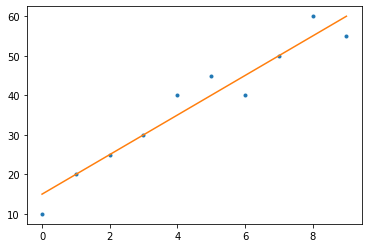

Loss: 15.0


In [48]:
import numpy as np
from numpy.polynomial.polynomial import polyfit
import matplotlib.pyplot as plt

m = 5  # -2 to start, change me please
b = 15  # 40 to start, change me please

# Sample data
x = np.array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9])
y = np.array([10, 20, 25, 30, 40, 45, 40, 50, 60, 55])
y_hat = x * m + b

plt.plot(x, y, '.')
plt.plot(x, y_hat, '-')
plt.show()

print("Loss:", np.sum((y - y_hat)**2)/len(x))

아이디어가 있습니까? 좋습니다! 넘어가기 전에 커널을 종료해 주십시오.

In [49]:
import IPython
app = IPython.Application.instance()
app.kernel.do_shutdown(True)

{'status': 'ok', 'restart': True}